Bollywood movie analysis (Analyzing gender-based stereotypes)

In [5]:
# importing all the relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
import pandas as pd
from glob import glob
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
#Import data from database
df= pd.read_csv("C:/Users/aksha/Desktop/Bollywood-Data-master/trailer-data/complete-data.csv")

In [7]:
cols = ['frame_number', 'gender', 'emotion', 'year', 'movie_name']
df.head()

,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya


Analysis of the Emotions of male and Female

In [8]:
df_woman = df.loc[df['gender'] == 'woman']
df_man = df.loc[df['gender'] == 'man']
df_woman = df_woman.loc[df['emotion'] != 'neutral']
df_man = df_man.loc[df['emotion'] != 'neutral']

WomanFramesPerYear = df_woman.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()
manframesperyear = df_man.groupby(by=['year'])['frame_number'].count().to_frame(name = 'count').reset_index()

In [9]:
res_woman = df_woman.groupby(by=['emotion'])['frame_number'].count()
res_woman=res_woman.to_frame(name = 'count').reset_index()
labels=res_woman['emotion'].tolist()

res_man = df_man.groupby(by=['emotion'])['frame_number'].count()
res_man=res_man.to_frame(name = 'count').reset_index()
labels=res_man['emotion'].tolist()

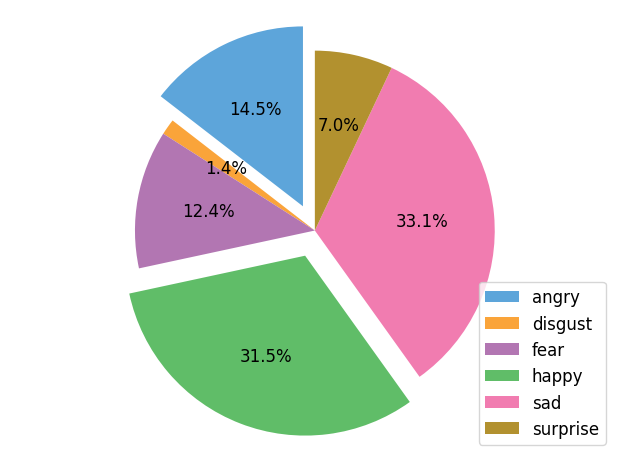

In [83]:
#ploting female pie chart

plt.rcParams.update({'font.size': 12})

colors = ['#5DA5DA', '#FAA43A', '#B276B2', '#60BD68', '#F17CB0', '#B2912F', '#DECF3F']
plt.pie(res_woman['count'], shadow=False, colors=colors, explode=(0.15, 0, 0, 0.15, 0, 0),
    startangle=90,
    autopct='%1.1f%%')

plt.axis('equal')
plt.legend(res_woman['emotion'])
plt.tight_layout()

Sad and Happy are top two emotions for woman

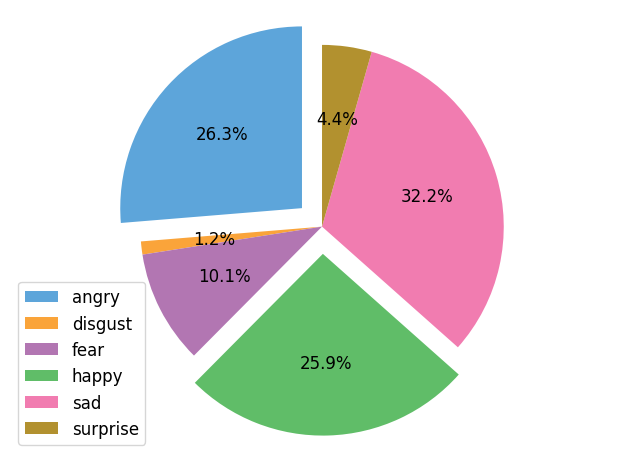

In [11]:
#ploting male pie chart

plt.rcParams.update({'font.size': 12})

plt.pie(res_man['count'], shadow=False, colors=colors, explode=(0.15, 0, 0, 0.15, 0, 0),
    startangle=90,
    autopct='%1.1f%%')
plt.axis('equal')
plt.legend(res_man['emotion'])
plt.tight_layout()

In [12]:
year_woman = df_woman.groupby(by=['emotion','year'])['frame_number'].count()
for emotion in res_woman['emotion']:
    ym = year_woman[emotion].to_frame(name = emotion+'emotioncount').reset_index()
    WomanFramesPerYear = pd.merge(WomanFramesPerYear,ym, on ='year')
    WomanFramesPerYear[emotion] = WomanFramesPerYear[emotion+'emotioncount']*1.0/WomanFramesPerYear['count']*100
WomanFramesPerYear.head()

,year,count,angryemotioncount,angry,disgustemotioncount,disgust,fearemotioncount,fear,happyemotioncount,happy,sademotioncount,sad,surpriseemotioncount,surprise
0,2008,309,36,11.650485,3,0.970874,25,8.090615,101,32.686084,120,38.834951,24,7.766990
1,2009,280,40,14.285714,3,1.071429,25,8.928571,81,28.928571,110,39.285714,21,7.500000
2,2010,562,87,15.480427,4,0.711744,69,12.277580,176,31.316726,198,35.231317,28,4.982206
3,2011,755,86,11.390728,15,1.986755,91,12.052980,242,32.052980,268,35.496689,53,7.019868
4,2012,521,66,12.667946,13,2.495202,68,13.051823,173,33.205374,158,30.326296,43,8.253359


In [13]:
df_w = WomanFramesPerYear.drop('count', axis=1)
del df_w['angryemotioncount']
del df_w['disgustemotioncount']
del df_w['fearemotioncount']
del df_w['happyemotioncount']
del df_w['sademotioncount']
del df_w['surpriseemotioncount']
df_w.head()
#removing unnecessary columns

,year,angry,disgust,fear,happy,sad,surprise
0,2008,11.650485,0.970874,8.090615,32.686084,38.834951,7.766990
1,2009,14.285714,1.071429,8.928571,28.928571,39.285714,7.500000
2,2010,15.480427,0.711744,12.277580,31.316726,35.231317,4.982206
3,2011,11.390728,1.986755,12.052980,32.052980,35.496689,7.019868
4,2012,12.667946,2.495202,13.051823,33.205374,30.326296,8.253359


In [14]:
year_man = df_man.groupby(by=['emotion','year'])['frame_number'].count()
for emotion in res_man['emotion']:
    ym = year_man[emotion].to_frame(name = emotion+'emotioncount').reset_index()
    manframesperyear = pd.merge(manframesperyear,ym, on ='year')
    manframesperyear[emotion] = manframesperyear[emotion+'emotioncount']*1.0/manframesperyear['count']*100
manframesperyear.head()

,year,count,angryemotioncount,angry,disgustemotioncount,disgust,fearemotioncount,fear,happyemotioncount,happy,sademotioncount,sad,surpriseemotioncount,surprise
0,2008,639,153,23.943662,4,0.625978,52,8.137715,175,27.386541,230,35.993740,25,3.912363
1,2009,677,192,28.360414,5,0.738552,59,8.714919,164,24.224520,231,34.121123,26,3.840473
2,2010,1210,305,25.206612,21,1.735537,139,11.487603,306,25.289256,395,32.644628,44,3.636364
3,2011,1480,331,22.364865,18,1.216216,155,10.472973,381,25.743243,544,36.756757,51,3.445946
4,2012,1232,334,27.110390,13,1.055195,102,8.279221,366,29.707792,359,29.139610,58,4.707792


In [15]:
df_m = manframesperyear.drop('count', axis=1)
del df_m['angryemotioncount']
del df_m['disgustemotioncount']
del df_m['fearemotioncount']
del df_m['happyemotioncount']
del df_m['sademotioncount']
del df_m['surpriseemotioncount']
df_m.head()

,year,angry,disgust,fear,happy,sad,surprise
0,2008,23.943662,0.625978,8.137715,27.386541,35.993740,3.912363
1,2009,28.360414,0.738552,8.714919,24.224520,34.121123,3.840473
2,2010,25.206612,1.735537,11.487603,25.289256,32.644628,3.636364
3,2011,22.364865,1.216216,10.472973,25.743243,36.756757,3.445946
4,2012,27.110390,1.055195,8.279221,29.707792,29.139610,4.707792


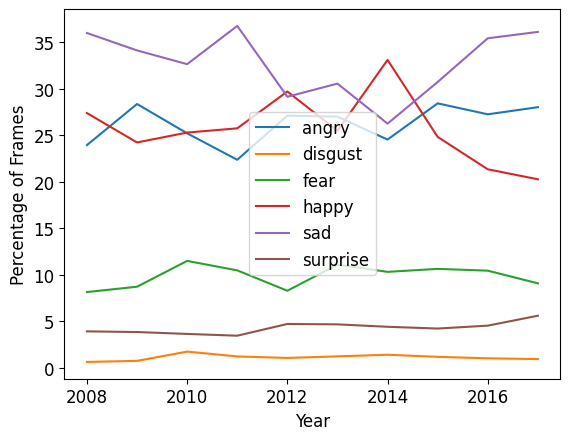

In [16]:
y_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise']
ax = df_m.plot.line(x = 'year', y = y_labels)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")

fig = ax.get_figure()

fig.savefig('man_emotions_over_years.png')

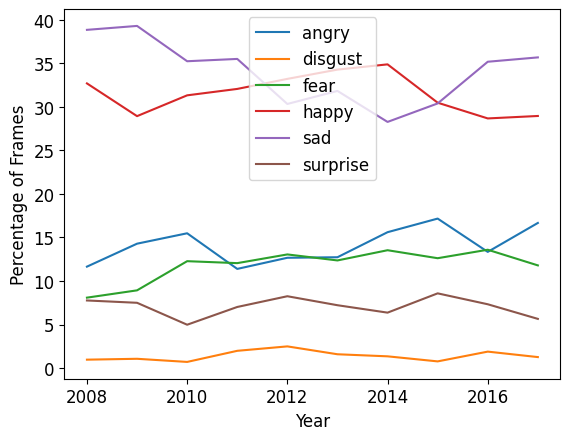

In [17]:
ax = df_w.plot.line(x = 'year', y = y_labels)
ax.set_xlabel("Year")
ax.set_ylabel("Percentage of Frames")
fig = ax.get_figure()

In [18]:
df_w_new = df_w
df_w_new.columns = ['year', 'woman_angry', 'woman_disgust', 'woman_fear', 'woman_happy', 'woman_sad', 'woman_surprise']


del df_w_new['woman_disgust']
del df_w_new['woman_fear']
del df_w_new['woman_surprise']

In [19]:
df_m_new = df_m
df_m_new.columns = ['year', 'man_angry', 'man_disgust', 'man_fear', 'man_happy', 'man_sad', 'man_surprise']

del df_m_new['man_disgust']
del df_m_new['man_fear']
del df_m_new['man_surprise']

In [20]:
df_common = pd.merge(df_m_new, df_w_new, on= 'year')
df_common.head()

,year,man_angry,man_happy,man_sad,woman_angry,woman_happy,woman_sad
0,2008,23.943662,27.386541,35.993740,11.650485,32.686084,38.834951
1,2009,28.360414,24.224520,34.121123,14.285714,28.928571,39.285714
2,2010,25.206612,25.289256,32.644628,15.480427,31.316726,35.231317
3,2011,22.364865,25.743243,36.756757,11.390728,32.052980,35.496689
4,2012,27.110390,29.707792,29.139610,12.667946,33.205374,30.326296


In [21]:
# glob("C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/*")

['C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\avg_wv_relation.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\coref_plot.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\female_adjectives.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\female_adjverb.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\female_centrality.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\female_mentions_centrality.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\female_verb.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\image_and_plot_mentions_fequency.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\male_adjectives.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\male_adjverb.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data\\male_centrality.csv',
 'C:/Users/aksha/Desktop/Bollywood-Data-master

In [22]:
# df_wiki= pd.DataFrame(glob("D:/docu3c_intership_files/Bollywood-Data-master/wikipedia-data/*"))

In [23]:
# df_wiki.head()

How are males and females described 

In [24]:
df_m= pd.read_csv("C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/male_adjectives.csv", error_bad_lines=False)
#we are skipping lines that are not in proper format
print(df_m)

      year     adjective Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0     1970            []        NaN        NaN        NaN        NaN   
1     1970  [unhappilly]        NaN        NaN        NaN        NaN   
2     1970            []        NaN        NaN        NaN        NaN   
3     1970            []        NaN        NaN        NaN        NaN   
4     1970      [famous]        NaN        NaN        NaN        NaN   
...    ...           ...        ...        ...        ...        ...   
9375  1971            []        NaN        NaN        NaN        NaN   
9376  1971            []        NaN        NaN        NaN        NaN   
9377  1971            []        NaN        NaN        NaN        NaN   
9378  1971     [widowed]        NaN        NaN        NaN        NaN   
9379  1971            []        NaN        NaN        NaN        NaN   

     Unnamed: 6  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
9375     

C:\Users\aksha\AppData\Local\Temp\ipykernel_2316\1353134486.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_m= pd.read_csv("C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/male_adjectives.csv", error_bad_lines=False)


In [25]:
df_f= pd.read_csv("C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/female_adjectives.csv", error_bad_lines=False)
#we are skipping lines that are not in proper format
print(df_f)

      year         adjective Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0     1970           [young]        NaN        NaN        NaN        NaN   
1     1970                []        NaN        NaN        NaN        NaN   
2     1970                []        NaN        NaN        NaN        NaN   
3     1970                []        NaN        NaN        NaN        NaN   
4     1970  [unrecognizable]        NaN        NaN        NaN        NaN   
...    ...               ...        ...        ...        ...        ...   
5053  2008                []        NaN        NaN        NaN        NaN   
5054  2008                []        NaN        NaN        NaN        NaN   
5055  1971                []        NaN        NaN        NaN        NaN   
5056  1971            [long]        NaN        NaN        NaN        NaN   
5057  1971       [beautiful]        NaN        NaN        NaN        NaN   

     Unnamed: 6  
0           NaN  
1           NaN  
2           NaN  
3           NaN

C:\Users\aksha\AppData\Local\Temp\ipykernel_2316\1373310552.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_f= pd.read_csv("C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/female_adjectives.csv", error_bad_lines=False)


In [26]:
df_m.drop(df_m.index[df_m['adjective'] == '[]'], inplace=True)
#deleteing the columns with null values
df_m

,year,adjective,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
1,1970,[unhappilly],NaN,NaN,NaN,NaN,NaN
4,1970,[famous],NaN,NaN,NaN,NaN,NaN
5,1970,[shy,young],NaN,NaN,NaN,NaN
9,1970,[general],NaN,NaN,NaN,NaN,NaN
10,1970,[cruel],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9349,2007,[middle,armed,regular],NaN,NaN,NaN
9360,2008,[rich],NaN,NaN,NaN,NaN,NaN
9369,2008,[reluctant],NaN,NaN,NaN,NaN,NaN
9371,2008,[reluctant],NaN,NaN,NaN,NaN,NaN


In [27]:
most_adj_m=df_m["adjective"].value_counts()#finding most used adjectives for male
print(most_adj_m)

[young]         151
[old]            47
[young           45
[real]           39
[wealthy]        38
               ... 
[deranged]        1
[Western]         1
[westernised      1
[miscreant]       1
[middle           1
Name: adjective, Length: 688, dtype: int64


<Axes: >

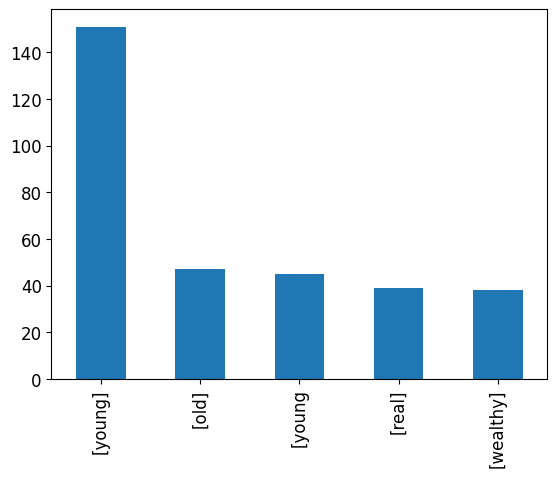

In [28]:
most_adj_m.head().plot(kind='bar')
#visualization of top 5 adjectives for male

In [29]:
df_f.drop(df_f.index[df_f['adjective'] == '[]'], inplace=True)
#deleteing the columns with null values
df_f

,year,adjective,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1970,[young],NaN,NaN,NaN,NaN,NaN
4,1970,[unrecognizable],NaN,NaN,NaN,NaN,NaN
9,1970,[sister],NaN,NaN,NaN,NaN,NaN
18,1970,[real],NaN,NaN,NaN,NaN,NaN
21,1970,[young],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
5035,2008,[widowed],NaN,NaN,NaN,NaN,NaN
5044,2008,[Indian],NaN,NaN,NaN,NaN,NaN
5045,2008,[young],NaN,NaN,NaN,NaN,NaN
5056,1971,[long],NaN,NaN,NaN,NaN,NaN


[young]         123
[beautiful]      55
[beautiful       34
[rich]           31
[young           31
               ... 
[frustrated]      1
[docile           1
[loving           1
[tribal]          1
[flat]            1
Name: adjective, Length: 464, dtype: int64


<Axes: >

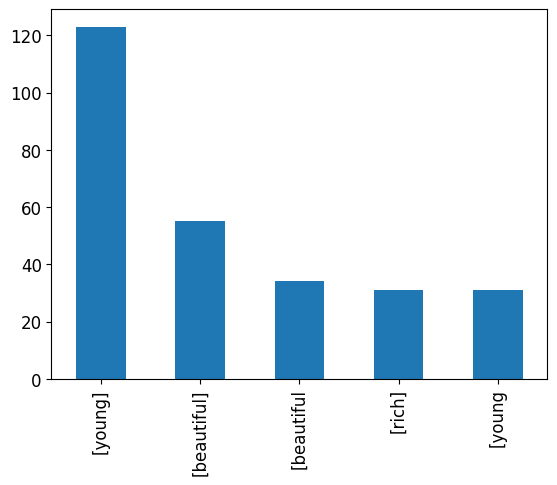

In [30]:
most_adj_f=df_f["adjective"].value_counts()
#finding most used adjectives for female
print(most_adj_f)
most_adj_f.head().plot(kind ='bar')

Centrality of Male and Female Characters

In [31]:
df_m = pd.read_csv("C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/male_mentions_centrality.csv")


In [32]:
df_f = pd.read_csv('C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/female_mentions_centrality.csv')

In [33]:
df_m.head()


,MOVIE NAME,CAST,MENTIONS,TOTAL CENTRALITY,COUNT,AVERAGE CENTRALITY
0,Aan Milo Sajna,anil,13.0,9219.200000,131.0,70.375573
1,Bachpan,tom,11.0,29.000000,59.0,0.491525
2,Bachpan,father,5.0,469.333333,63.0,7.449735
3,Bachpan,rahim,2.0,0.000000,29.0,0.000000
4,Aag Aur Shola,nagesh,4.0,94.000000,38.0,2.473684


In [34]:
df_f.head()

,MOVIE NAME,CAST,MENTIONS,TOTAL CENTRALITY,COUNT,AVERAGE CENTRALITY
0,Aan Milo Sajna,woman,2.0,222.500000,12.0,18.541667
1,Aan Milo Sajna,savitri,11.0,868.166667,131.0,6.627226
2,Aan Milo Sajna,deepali,4.0,0.000000,89.0,0.000000
3,Abhinetri,anjana,9.0,319.000000,79.0,4.037975
4,Aag Aur Shola,usha,6.0,48.000000,54.0,0.888889


In [35]:
df_f['MOVIE NAME']


0            Aan Milo Sajna
1            Aan Milo Sajna
2            Aan Milo Sajna
3                 Abhinetri
4             Aag Aur Shola
               ...         
5043    Rab Ne Bana Di Jodi
5044    Rab Ne Bana Di Jodi
5045                Ghajini
5046                Ghajini
5047                  Jumbo
Name: MOVIE NAME, Length: 5048, dtype: object

In [36]:
df_f = df_f.groupby(['MOVIE NAME'], sort = False).max()
print(df_f)
f_mentions=df_f["MENTIONS"]


                      MENTIONS  TOTAL CENTRALITY  COUNT  AVERAGE CENTRALITY
MOVIE NAME                                                                 
Aan Milo Sajna            11.0        868.166667  131.0           18.541667
Abhinetri                  9.0        319.000000   79.0            4.037975
Aag Aur Shola              6.0         48.000000   54.0            0.888889
Aakhree Raasta             0.0        256.000000  136.0            1.882353
Aap Ke Saath               5.0        280.500000   36.0            7.791667
...                        ...               ...    ...                 ...
Meerabai Not Out          10.0          0.000000   85.0            0.000000
Gumnaam  The Mystery      27.0       1848.266667  217.0           12.441176
Rab Ne Bana Di Jodi       81.0       6975.333333  596.0           12.789474
Ghajini                   22.0        624.166667  242.0            3.337790
Jumbo                      4.0        116.833333   60.0            1.947222

[2034 rows 

C:\Users\aksha\AppData\Local\Temp\ipykernel_2316\3022504939.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_f = df_f.groupby(['MOVIE NAME'], sort = False).max()


In [37]:
print(f_mentions)

MOVIE NAME
Aan Milo Sajna          11.0
Abhinetri                9.0
Aag Aur Shola            6.0
Aakhree Raasta           0.0
Aap Ke Saath             5.0
                        ... 
Meerabai Not Out        10.0
Gumnaam  The Mystery    27.0
Rab Ne Bana Di Jodi     81.0
Ghajini                 22.0
Jumbo                    4.0
Name: MENTIONS, Length: 2034, dtype: float64


In [38]:
df_m = df_m.groupby(['MOVIE NAME'], sort = False).max()
print(df_m)


                      MENTIONS  TOTAL CENTRALITY  COUNT  AVERAGE CENTRALITY
MOVIE NAME                                                                 
Aan Milo Sajna            13.0       9219.200000  131.0           70.375573
Bachpan                   11.0        469.333333   63.0            7.449735
Aag Aur Shola             13.0        463.766667   97.0            4.881754
Aakhree Raasta             0.0        108.333333  142.0            2.486486
Aap Ke Saath               7.0        422.000000   69.0            6.115942
...                        ...               ...    ...                 ...
Dil Kabaddi                1.0         64.000000   13.0            4.923077
Gumnaam  The Mystery       5.0        128.000000   50.0            2.844444
Rab Ne Bana Di Jodi       28.0       1142.500000  428.0            4.945887
Ghajini                   73.0       1307.250000  492.0            5.764706
Jumbo                     18.0        640.833333  223.0            9.138298

[2380 rows 

C:\Users\aksha\AppData\Local\Temp\ipykernel_2316\1326509740.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_m = df_m.groupby(['MOVIE NAME'], sort = False).max()


In [39]:
df_m.rename(columns = {'MENTIONS':'M_MENTIONS'}, inplace = True)
df_m

,M_MENTIONS,TOTAL CENTRALITY,COUNT,AVERAGE CENTRALITY
MOVIE NAME,,,,
Aan Milo Sajna,13.0,9219.200000,131.0,70.375573
Bachpan,11.0,469.333333,63.0,7.449735
Aag Aur Shola,13.0,463.766667,97.0,4.881754
Aakhree Raasta,0.0,108.333333,142.0,2.486486
Aap Ke Saath,7.0,422.000000,69.0,6.115942
...,...,...,...,...
Dil Kabaddi,1.0,64.000000,13.0,4.923077
Gumnaam The Mystery,5.0,128.000000,50.0,2.844444
Rab Ne Bana Di Jodi,28.0,1142.500000,428.0,4.945887


In [88]:
m_mentions=df_m['M_MENTIONS']
print(m_mentions)


MOVIE NAME
Aan Milo Sajna          13.0
Bachpan                 11.0
Aag Aur Shola           13.0
Aakhree Raasta           0.0
Aap Ke Saath             7.0
                        ... 
Dil Kabaddi              1.0
Gumnaam  The Mystery     5.0
Rab Ne Bana Di Jodi     28.0
Ghajini                 73.0
Jumbo                   18.0
Name: M_MENTIONS, Length: 2380, dtype: float64


In [89]:
df_horizontal_concat_mentions = pd.concat([m_mentions,f_mentions], axis=1)
df_horizontal_concat_mentions


,M_MENTIONS,MENTIONS
MOVIE NAME,,
Aan Milo Sajna,13.0,11.0
Bachpan,11.0,NaN
Aag Aur Shola,13.0,6.0
Aakhree Raasta,0.0,0.0
Aap Ke Saath,7.0,5.0
...,...,...
Anwar,NaN,12.0
Bhram,NaN,4.0
Jahan Jaaeyega Hamen Paaeyega,NaN,3.0


In [42]:
df_horizontal_concat_mentions['total'] =df_horizontal_concat_mentions["MENTIONS"] + df_horizontal_concat_mentions['M_MENTIONS']
df_horizontal_concat_mentions


,M_MENTIONS,MENTIONS,total
MOVIE NAME,,,
Aan Milo Sajna,13.0,11.0,24.0
Bachpan,11.0,NaN,NaN
Aag Aur Shola,13.0,6.0,19.0
Aakhree Raasta,0.0,0.0,0.0
Aap Ke Saath,7.0,5.0,12.0
...,...,...,...
Anwar,NaN,12.0,NaN
Bhram,NaN,4.0,NaN
Jahan Jaaeyega Hamen Paaeyega,NaN,3.0,NaN


In [43]:
#(13/24) *100 -> 54%
df_horizontal_concat_mentions['male_percent'] = (df_horizontal_concat_mentions['M_MENTIONS'] / 
                      df_horizontal_concat_mentions['total']) * 100
df_horizontal_concat_mentions['female_percent'] = (df_horizontal_concat_mentions['MENTIONS'] / 
                      df_horizontal_concat_mentions['total']) * 100
df_horizontal_concat_mentions

,M_MENTIONS,MENTIONS,total,male_percent,female_percent
MOVIE NAME,,,,,
Aan Milo Sajna,13.0,11.0,24.0,54.166667,45.833333
Bachpan,11.0,NaN,NaN,NaN,NaN
Aag Aur Shola,13.0,6.0,19.0,68.421053,31.578947
Aakhree Raasta,0.0,0.0,0.0,NaN,NaN
Aap Ke Saath,7.0,5.0,12.0,58.333333,41.666667
...,...,...,...,...,...
Anwar,NaN,12.0,NaN,NaN,NaN
Bhram,NaN,4.0,NaN,NaN,NaN
Jahan Jaaeyega Hamen Paaeyega,NaN,3.0,NaN,NaN,NaN


In [44]:
df_horizontal_concat_mentions.dropna()

,M_MENTIONS,MENTIONS,total,male_percent,female_percent
MOVIE NAME,,,,,
Aan Milo Sajna,13.0,11.0,24.0,54.166667,45.833333
Aag Aur Shola,13.0,6.0,19.0,68.421053,31.578947
Aap Ke Saath,7.0,5.0,12.0,58.333333,41.666667
Chetna,18.0,23.0,41.0,43.902439,56.097561
Aisa Pyaar Kahan,10.0,5.0,15.0,66.666667,33.333333
...,...,...,...,...,...
Maharathi,32.0,13.0,45.0,71.111111,28.888889
Gumnaam The Mystery,5.0,27.0,32.0,15.625000,84.375000
Rab Ne Bana Di Jodi,28.0,81.0,109.0,25.688073,74.311927


In [45]:

average = df_horizontal_concat_mentions['male_percent'].sum() / 1749
print("average male percentage is : " ,average ,end="\n")
average = df_horizontal_concat_mentions['female_percent'].sum() / 1749
print("average female percentage is : " ,average ,end="\n")

average male percentage is :  59.81847009038827
average female percentage is :  40.18152990961173


Average male percentage is :  59.82% 

Average female percentage is :  40.18%

<Axes: xlabel='total'>

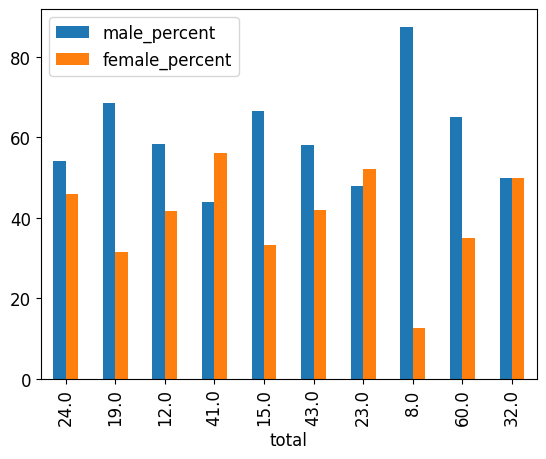

In [86]:
df_horizontal_concat_mentions.head(10).plot(x='total', y=['male_percent', 'female_percent'], kind="bar")

Singers - Does the same bias occur inmovie songs?

In [87]:
df_singers = pd.read_csv('C:/Users/aksha/Desktop/Bollywood-Data-master/wikipedia-data/songsFrequency.csv')

In [48]:
df_singers.head()

,MOVIE NAME,YEAR,MALE SINGER COUNT,FEMALE SINGER COUNT,MALE SONG COUNT,FEMALE SONG COUNT
0,Raabta (film)_2017,2017,5.0,2.0,8.0,2.0
1,Luv U Soniyo_2013,2013,4.0,1.0,6.0,1.0
2,Sahibaan_1993,1993,2.0,2.0,3.0,6.0
3,Baap Numbri Beta Dus Numbri_1990,1990,1.0,2.0,1.0,4.0
4,Jyoti Bane Jwala_1980,1980,3.0,3.0,4.0,5.0


In [49]:
df_singers['total'] = df_singers[" MALE SINGER COUNT"] + df_singers[" FEMALE SINGER COUNT"]
# df_singers[' FEMALE SINGER COUNT']
# df_singers

In [50]:
df_singers['male_percent'] = (df_singers[' MALE SINGER COUNT'] / 
                      df_singers['total']) * 100
df_singers['female_percent'] = (df_singers[' FEMALE SINGER COUNT'] / 
                      df_singers['total']) * 100
df_singers

,MOVIE NAME,YEAR,MALE SINGER COUNT,FEMALE SINGER COUNT,MALE SONG COUNT,FEMALE SONG COUNT,total,male_percent,female_percent
0,Raabta (film)_2017,2017,5.0,2.0,8.0,2.0,7.0,71.428571,28.571429
1,Luv U Soniyo_2013,2013,4.0,1.0,6.0,1.0,5.0,80.000000,20.000000
2,Sahibaan_1993,1993,2.0,2.0,3.0,6.0,4.0,50.000000,50.000000
3,Baap Numbri Beta Dus Numbri_1990,1990,1.0,2.0,1.0,4.0,3.0,33.333333,66.666667
4,Jyoti Bane Jwala_1980,1980,3.0,3.0,4.0,5.0,6.0,50.000000,50.000000
...,...,...,...,...,...,...,...,...,...
2444,Jhoota Kahin Ka_1979,1979,2.0,1.0,5.0,5.0,3.0,66.666667,33.333333
2445,Ghar Ki Laaj_1993,1993,3.0,1.0,6.0,2.0,4.0,75.000000,25.000000
2446,Chandra Mukhi_1993,1993,3.0,3.0,6.0,5.0,6.0,50.000000,50.000000
2447,Jai Bangladesh_1971,1971,2.0,4.0,4.0,8.0,6.0,33.333333,66.666667


<Axes: xlabel=' YEAR'>

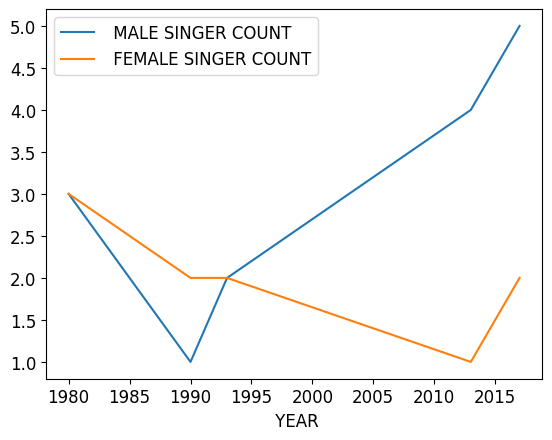

In [51]:
df_singers.head().plot(x=' YEAR', y=[' MALE SINGER COUNT', ' FEMALE SINGER COUNT'])

In [52]:
df_singers['difference']=(df_singers['male_percent'] - df_singers['female_percent'])

In [53]:
#creating a new column with bias or not based on the current value of male percent and female percent
df_singers['bias'] = df_singers.apply(lambda row: 'non bias' if abs(row['male_percent'] - row['female_percent']) < 10 and abs(row['male_percent'] - row['female_percent']) > -10 else 'bias', axis=1)
df_singers

,MOVIE NAME,YEAR,MALE SINGER COUNT,FEMALE SINGER COUNT,MALE SONG COUNT,FEMALE SONG COUNT,total,male_percent,female_percent,difference,bias
0,Raabta (film)_2017,2017,5.0,2.0,8.0,2.0,7.0,71.428571,28.571429,42.857143,bias
1,Luv U Soniyo_2013,2013,4.0,1.0,6.0,1.0,5.0,80.000000,20.000000,60.000000,bias
2,Sahibaan_1993,1993,2.0,2.0,3.0,6.0,4.0,50.000000,50.000000,0.000000,non bias
3,Baap Numbri Beta Dus Numbri_1990,1990,1.0,2.0,1.0,4.0,3.0,33.333333,66.666667,-33.333333,bias
4,Jyoti Bane Jwala_1980,1980,3.0,3.0,4.0,5.0,6.0,50.000000,50.000000,0.000000,non bias
...,...,...,...,...,...,...,...,...,...,...,...
2444,Jhoota Kahin Ka_1979,1979,2.0,1.0,5.0,5.0,3.0,66.666667,33.333333,33.333333,bias
2445,Ghar Ki Laaj_1993,1993,3.0,1.0,6.0,2.0,4.0,75.000000,25.000000,50.000000,bias
2446,Chandra Mukhi_1993,1993,3.0,3.0,6.0,5.0,6.0,50.000000,50.000000,0.000000,non bias
2447,Jai Bangladesh_1971,1971,2.0,4.0,4.0,8.0,6.0,33.333333,66.666667,-33.333333,bias


Applying SVM on singers dataset 

In [54]:
df_singers = df_singers.dropna()  # Remove rows with NaN values
df_singers = df_singers[~df_singers.isin([np.inf, -np.inf]).any(axis=1)]

In [55]:
df_singers.drop('MOVIE NAME',axis=1)
df_singers.drop(' MALE SONG COUNT',axis=1)
df_singers.drop(' FEMALE SONG COUNT',axis=1)
x = df_singers[' FEMALE SINGER COUNT']
y = df_singers[' MALE SINGER COUNT']

In [56]:
X = df_singers[['male_percent', 'female_percent']]
y = df_singers['bias']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Liner Kernel

In [58]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [59]:
y_pred = model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.76


In [61]:
model =SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [62]:
y_pred = model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


Applying SVM on mentions database

In [64]:
df_horizontal_concat_mentions = df_horizontal_concat_mentions.dropna()  # Remove rows with NaN values
df_horizontal_concat_mentions = df_horizontal_concat_mentions[~df_horizontal_concat_mentions.isin([np.inf, -np.inf]).any(axis=1)] 

In [65]:
df_horizontal_concat_mentions['bias'] = df_horizontal_concat_mentions.apply(lambda row: 'non bias' if abs(row['male_percent'] - row['female_percent']) < 10 and abs(row['male_percent'] - row['female_percent']) > -10 else 'bias', axis=1)
df_horizontal_concat_mentions

,M_MENTIONS,MENTIONS,total,male_percent,female_percent,bias
MOVIE NAME,,,,,,
Aan Milo Sajna,13.0,11.0,24.0,54.166667,45.833333,non bias
Aag Aur Shola,13.0,6.0,19.0,68.421053,31.578947,bias
Aap Ke Saath,7.0,5.0,12.0,58.333333,41.666667,bias
Chetna,18.0,23.0,41.0,43.902439,56.097561,bias
Aisa Pyaar Kahan,10.0,5.0,15.0,66.666667,33.333333,bias
...,...,...,...,...,...,...
Maharathi,32.0,13.0,45.0,71.111111,28.888889,bias
Gumnaam The Mystery,5.0,27.0,32.0,15.625000,84.375000,bias
Rab Ne Bana Di Jodi,28.0,81.0,109.0,25.688073,74.311927,bias


In [66]:
X = df_singers[['male_percent', 'female_percent']]
y = df_singers['bias']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [68]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
y_pred = model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.76


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55)

Radial Basis Function

In [72]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [73]:
y_pred = model.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


Random Forest Classifier

In [75]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


In [77]:
name = input("enter the MOVIE NAME:" +"\n") 
row = df_singers.loc[df_singers['MOVIE NAME'] == name]

print("yes\n")
print(row[['male_percent', 'female_percent', 'bias']])

enter the MOVIE NAME:
Sahibaan_1993
yes

   male_percent  female_percent      bias
2          50.0            50.0  non bias
